In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

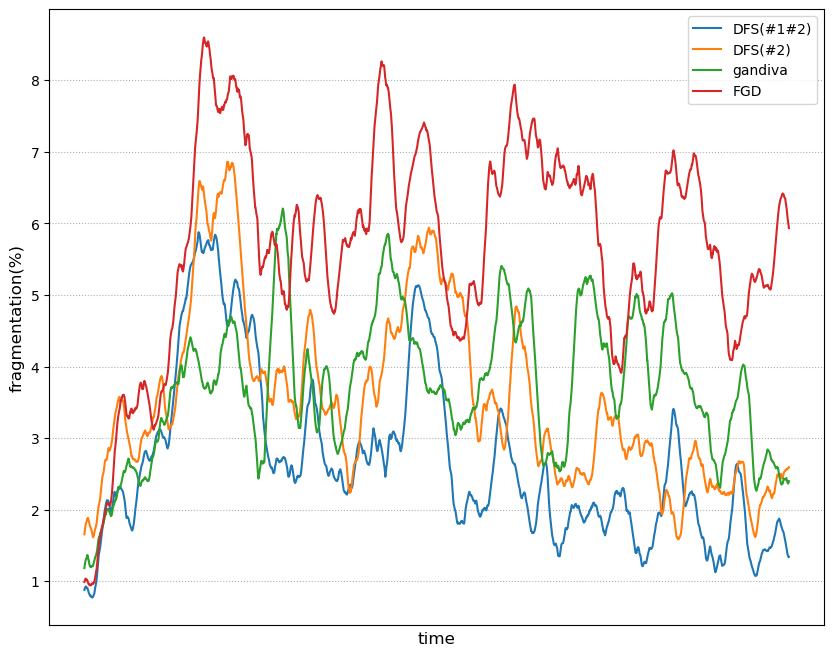

In [7]:
# schedulers = [ "defragS_1and2",  "defragS_2", "gandiva_sjf", "sjf_FGD"]
# labels = ['DFS(#1#2)',  "DFS(#2)", "gandiva", "FGD"]
schedulers = [ "defragS_sdf",  "defragS_2", "gandiva_sjf", "sjf_FGD"]
labels = ['DFS(#1#2)',  "DFS(#2)", "gandiva", "FGD"]
log_dir = "/data/nihaifeng/log/PPT_51"
saving = False
window_size = 60 * 24 * 1

fig = plt.figure(figsize=(10,8))
for idx, scheduler in enumerate(schedulers):
	df = pd.read_csv(log_dir+f'/Philly_{scheduler}/all/{scheduler}_all_seq.csv')
	y = df['fragmentation_ration']*100
	plt.plot(df['time'], y.rolling(window=window_size).mean(), label=labels[idx])

plt.xlabel('time', fontsize=12)
plt.xticks([])
plt.ylabel('fragmentation(%)', fontsize=12)
plt.legend(loc='best', fontsize=10)
plt.grid(linestyle=':')
plt.show()

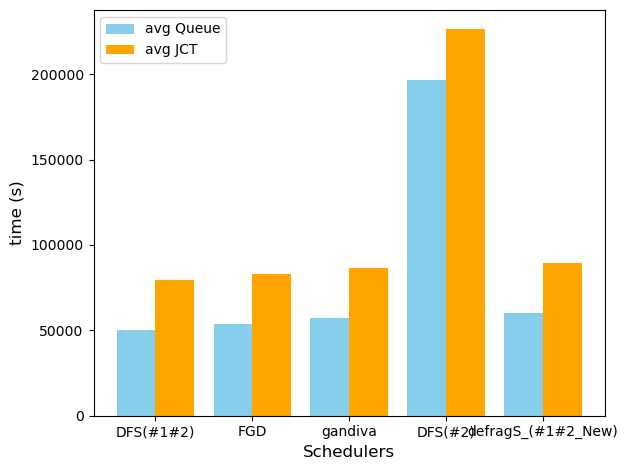

que_list:  [49961, 53388, 57139, 196764, 59944]
jct_list:  [79518, 82945, 86696, 226321, 89501]


In [8]:
schedulers = [ "defragS_1and2", "sjf_FGD",   "gandiva_sjf","defragS_2", "defragS_sdf"]
labels = ['DFS(#1#2)', "FGD", "gandiva","DFS(#2)", "defragS_(#1#2_New)" ]
que_list, jct_list = [], []
for scheduler in schedulers:
	df = pd.read_csv(log_dir+f'/Philly_{scheduler}/jct_avg.csv')
	jct_list.append(df.iloc[len(df)-1, 1])
	df = pd.read_csv(log_dir+f'/Philly_{scheduler}/que_avg.csv')
	que_list.append(df.iloc[len(df)-1, 1])
		

# 设置柱状图的宽度和位置
x_indices = np.arange(len(schedulers))  # x 轴位置
bar_width = 0.4  # 每个柱的宽度


# 绘制两组柱状图
plt.bar(x_indices - bar_width/2, que_list, bar_width, label='avg Queue', color='skyblue')
plt.bar(x_indices + bar_width/2, jct_list, bar_width, label='avg JCT', color='orange')

# 设置 x 轴标签
plt.xticks(x_indices, labels)
# plt.yticks([])

# 添加标题和坐标轴标签
plt.xlabel("Schedulers", fontsize=12)
plt.ylabel("time (s)", fontsize=12)

# 添加图例
plt.legend()

# 显示图表
plt.tight_layout()
plt.show()
print("que_list: ", que_list)
print("jct_list: ", jct_list)

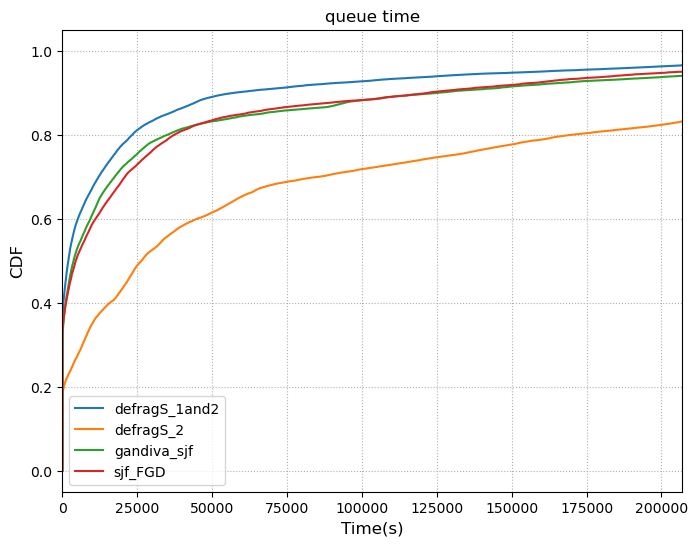

In [14]:
schedulers = [ "defragS_1and2",  "defragS_2", "gandiva_sjf", "sjf_FGD"]
labels = ['DFS(#1#2)',  "DFS(#2)", "gandiva", "FGD"]
log_dir = "/data/nihaifeng/log/PPT_51"
data_type = "queue"

fig = plt.figure(figsize=(8,6))
for idx, scheduler in enumerate(schedulers):
	df = pd.read_csv(log_dir+f'/Philly_{scheduler}/all/{scheduler}_all_log.csv')
	y = df[data_type]
	sorted_y = np.sort(y)
	cdf = np.arange(1, len(sorted_y) + 1) / len(sorted_y)
	plt.plot(sorted_y, cdf, label=scheduler)

x_min = np.min(sorted_y)
x_max = np.percentile(sorted_y, 95)  # 选择中位数作为最大范围
plt.xlim(x_min, x_max)  # 设置 x 轴范围

plt.title(f"{data_type} time")
plt.xlabel('Time(s)', fontsize=12)
plt.ylabel('CDF', fontsize=12)
plt.legend(loc='best', fontsize=10)
plt.grid(linestyle=':')
plt.show()

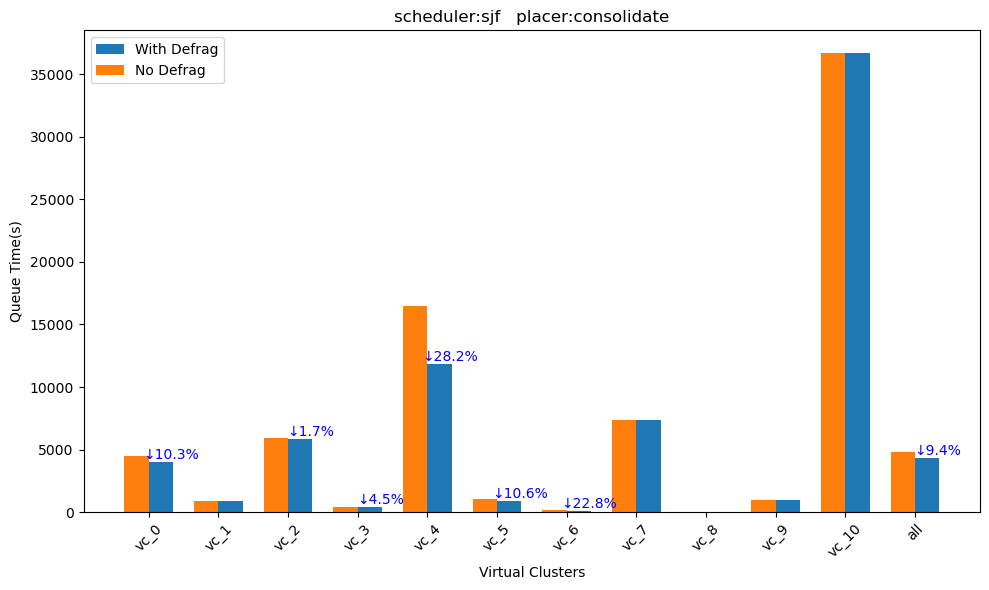

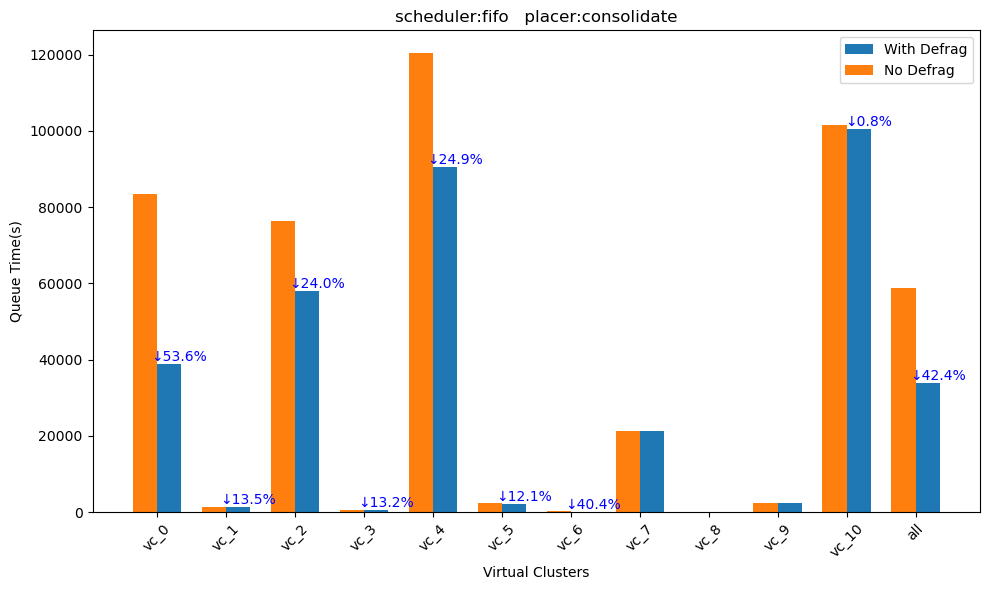

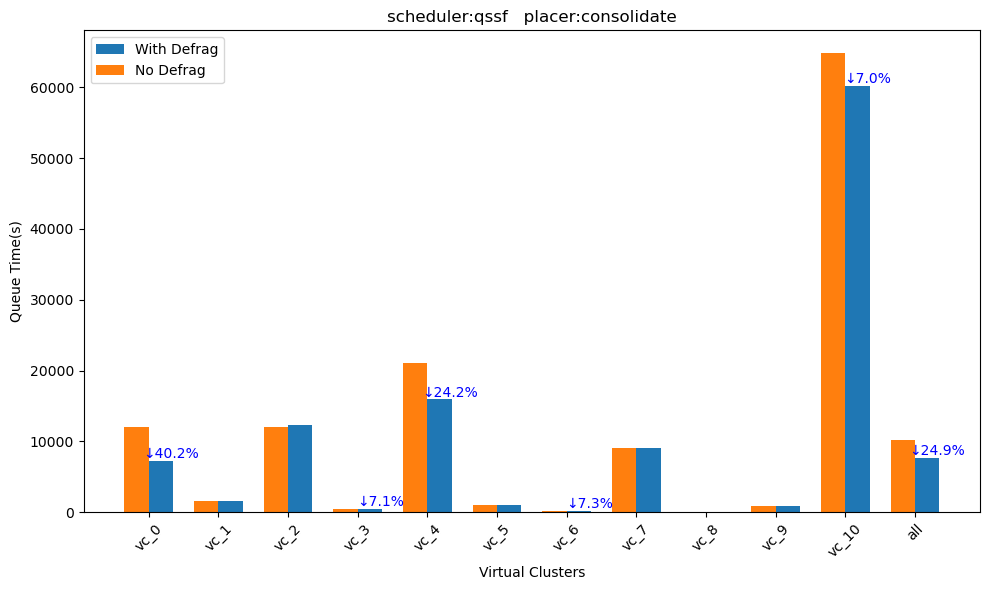

In [ ]:
df = pd.read_csv(log_dir + '/Philly_consolidate/que_avg_consolidate.csv')
df_noDeFrag = pd.read_csv(log_dir + '/noDeFra/Philly_consolidate/que_avg_consolidate.csv')

for scheduler in scheduler_ls:
	x = [f'vc_{i}' for i in range(len(df) - 1)]
	x.append('all')

	y1 = df[f'{scheduler}_consolidate']
	y2 = df_noDeFrag[f'{scheduler}_consolidate']

	# 计算减少比例
	reduction_percentage = ((y2 - y1) / y2 * 100).round(1)

	# 设置柱的宽度和位置
	bar_width = 0.35
	index = np.arange(len(x))
	
	# 创建图表
	fig, ax = plt.subplots(figsize=(10, 6))
	
	# 绘制两组数据的柱状图
	bar1 = ax.bar(index + bar_width, y1, bar_width, label='With Defrag')
	bar2 = ax.bar(index, y2, bar_width, label='No Defrag')
	
	# 设置标签、标题和刻度
	ax.set_xlabel('Virtual Clusters')
	ax.set_ylabel('Queue Time(s)')
	ax.set_title(f'scheduler:{scheduler}   placer:consolidate')
	ax.set_xticks(index + bar_width / 2)
	ax.set_xticklabels(x, rotation=45)

	# 在 y1 的柱状图上显示减少比例
	for i in range(len(y1)):
		if reduction_percentage[i] > 0:
			ax.text(index[i]+0.5, y1[i] + 0.05, f'↓{reduction_percentage[i]}%', ha='center', va='bottom', fontsize=10, color='blue')
	
	# 添加图例
	ax.legend()
	
	# 显示图表
	plt.tight_layout()
	plt.show()

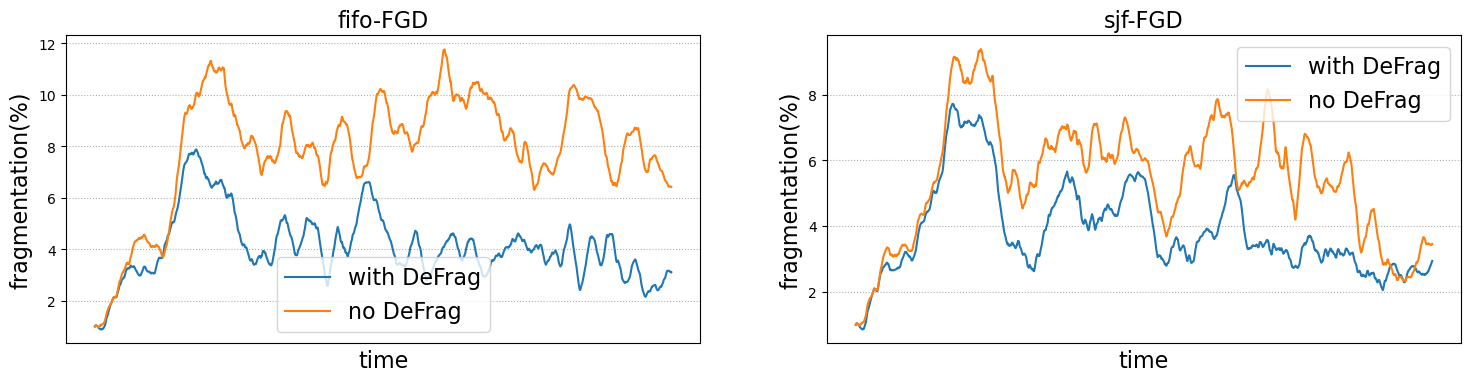

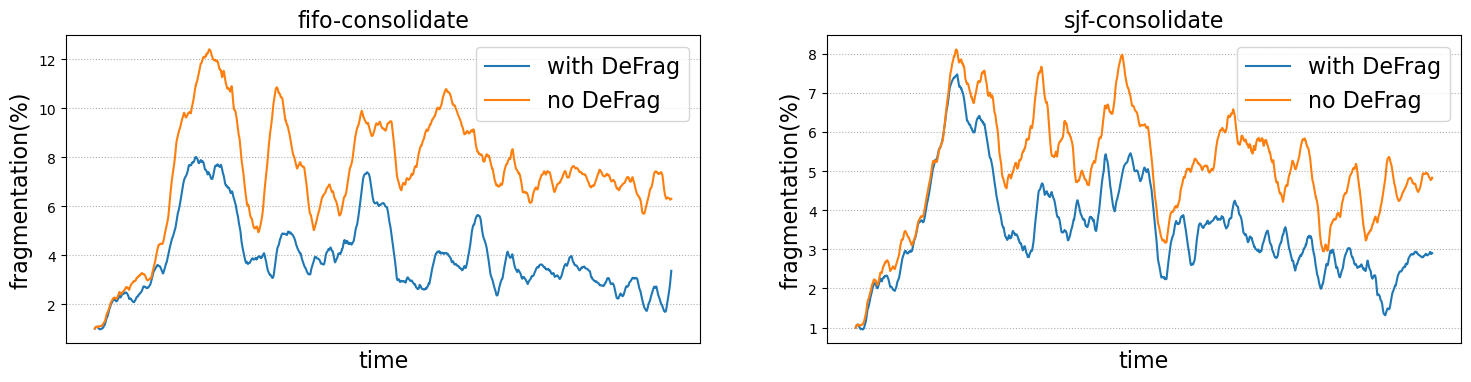

In [9]:
scheduler_ls = ['fifo', 'sjf'] 
placer_ls = ['FGD', 'consolidate']
log_dir = "/data/nihaifeng/log/test/"
saving = True
window_size = 60 * 24

for placer in placer_ls:
	fig, axes = plt.subplots(1, len(scheduler_ls), figsize=(18,4))
	axes = axes.flatten() 
	for idx, scheduler in enumerate(scheduler_ls):
		ax = axes[idx]
		df = pd.read_csv(log_dir+f'/deFrag/Philly_{placer}/all/{scheduler}_{placer}_all_seq.csv')
		y = df['fragmentation_ration']*100
		ax.plot(df['time'], y.rolling(window=window_size).mean(), label=f"with DeFrag")

		df = pd.read_csv(log_dir + f'/noDeFrag/Philly_{placer}/all/{scheduler}_{placer}_all_seq.csv')
		y = df['fragmentation_ration']*100
		ax.plot(df['time'], y.rolling(window=window_size).mean(), label=f"no DeFrag")

		ax.set_title(f'{scheduler}-{placer}', fontsize=16)
		ax.set_xlabel('time', fontsize=16)
		ax.set_xticks([])
		ax.set_ylabel('fragmentation(%)', fontsize=16)
		ax.legend(loc='best', fontsize=16)
		ax.grid(linestyle=':')

	if saving:
		plt.savefig(log_dir+f'/figures/{placer}_frag.pdf', bbox_inches="tight", dpi=600)
	else:
		plt.show()

对比不同pro下Queue时间累积分布

In [ ]:
for vc in vc_ls:
	for scheduler in scheduler_ls:
		for placer in placer_ls:
			fig = plt.figure(figsize=(8,4))
			for prob in prob_ls:
				try:
					df = pd.read_csv(f"{log_dir}/prob_{prob}/Philly_{placer}/{vc}/{scheduler}_{placer}_{vc}_log.csv")

					sorted_time_diff = np.sort(df['queue'])
					cdf = np.arange(1, len(sorted_time_diff)+1) / len(sorted_time_diff)  # 计算累积频率
					cdf *= 100
					# 绘制每个集群的累积分布曲线
					plt.plot(sorted_time_diff, cdf, label=f"prob:{prob/10}", alpha=0.9)
				except:
					continue
				
				# x = df['time']
				# y = df['fragmentation_ration']*100
				# x_smooth = np.linspace(x.min(), x.max(), 100)
				# spl = make_interp_spline(x, y, k=3)  # Cubic interpolation (三次插值)
				# y_smooth = spl(x_smooth)

				# plt.plot(x_smooth, y_smooth, label=f"prob:{prob/10}", linewidth=1.5)

			plt.title(f"VC:{vc}, Placer:{placer}, Scheduler:{scheduler}")
			plt.xlabel('Queue time')
			plt.ylabel('Fraction of Jobs(%)')
			# plt.ylabel('fragmentation(%)')
			# plt.xticks([])
			plt.legend(loc='best')
			plt.grid(linestyle=':')
			plt.show()

分析加入碎片整理后，碎片率无法下降的原因

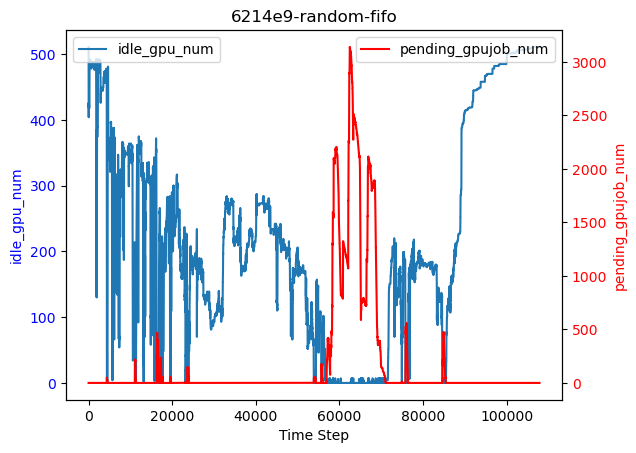

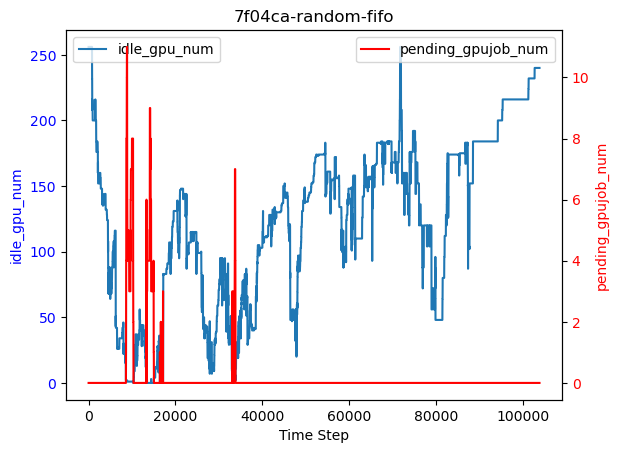

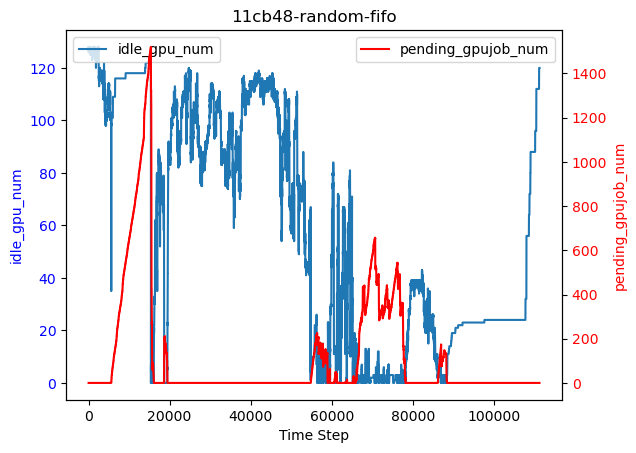

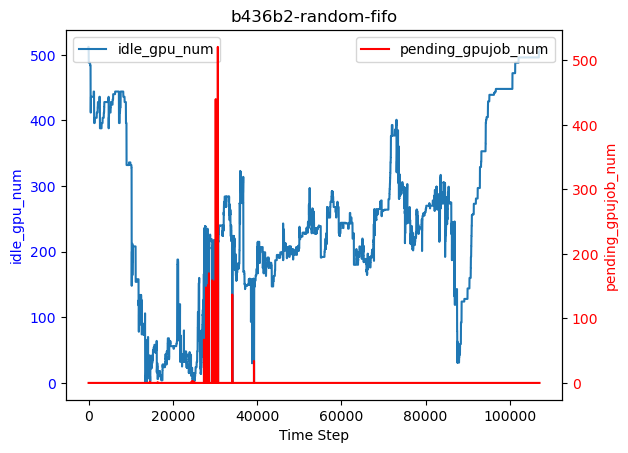

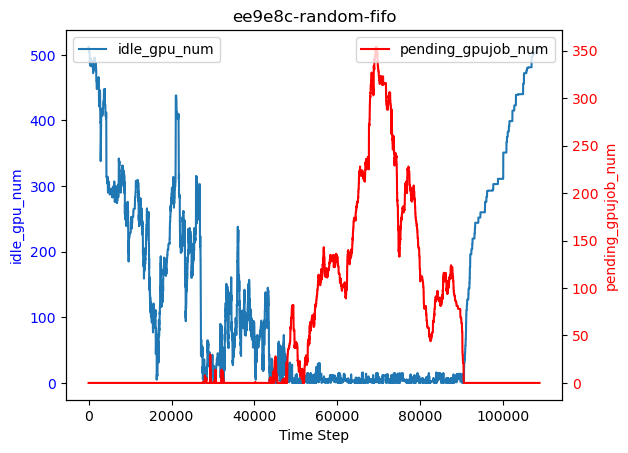

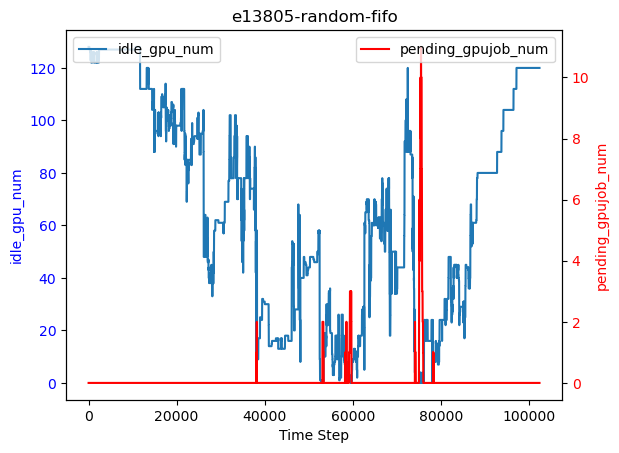

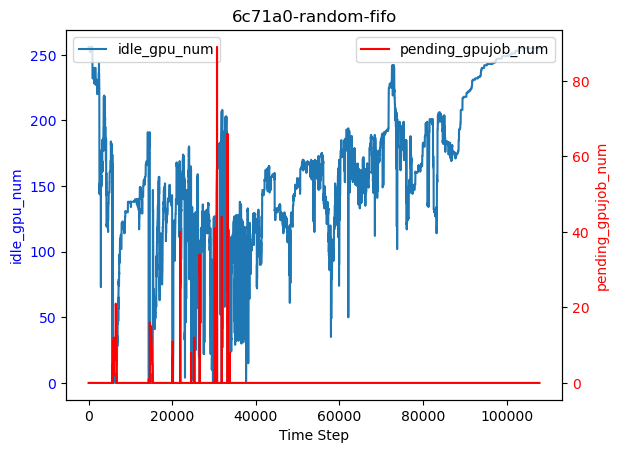

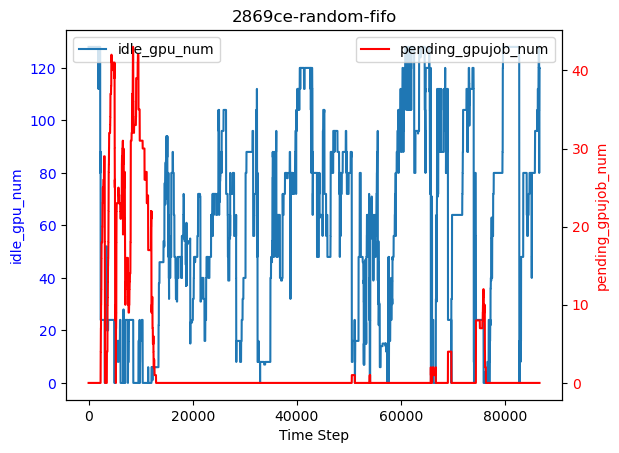

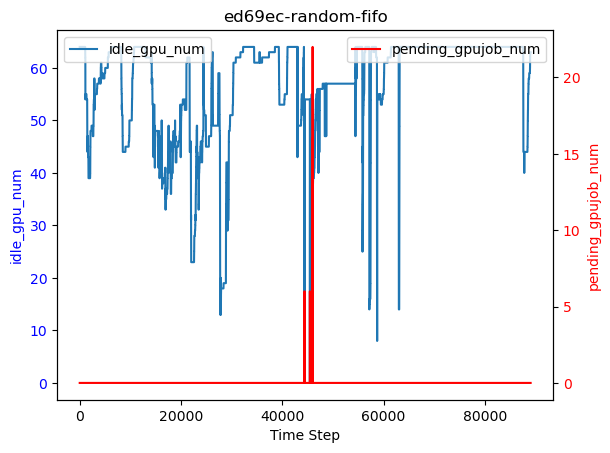

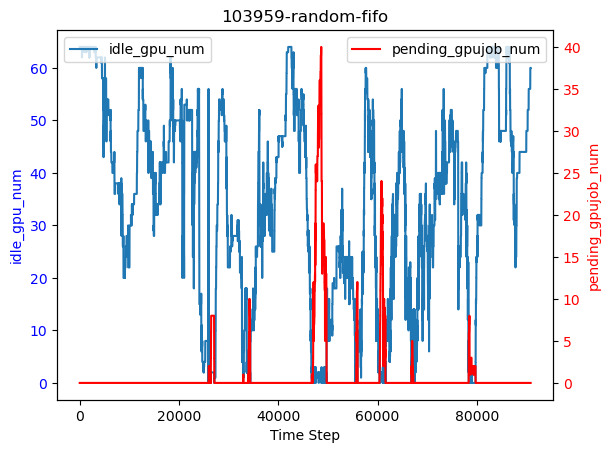

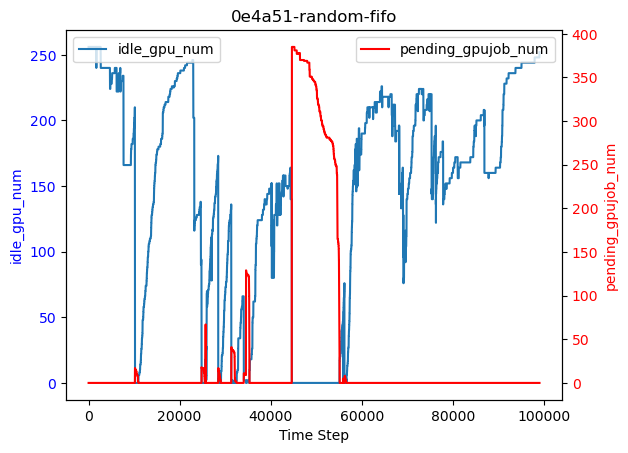

In [27]:
log_dir = "/data/nihaifeng/log"
vc_ls = pd.read_pickle('simulator/data/Philly/vc_dict_homo.pkl')
placer = 'random'
scheduler = 'fifo'
need_smoothing = False
window_size = 60*15

for vc in vc_ls:
	df = pd.read_csv(log_dir + f'/deFrag_VS_noDeFrag/frag_2/noDeFrag/Philly_{placer}/{vc}/{scheduler}_{placer}_{vc}_seq.csv')
	
	# 创建图形和主轴
	fig, ax1 = plt.subplots()

	# 绘制 idle_gpu_num
	data_name = 'idle_gpu_num'
	if need_smoothing:
		ax1.plot(df[data_name].rolling(window=window_size).mean(), label=data_name)
	else:
		ax1.plot(df[data_name], label=data_name)
	ax1.set_xlabel('Time Step')
	ax1.set_ylabel(data_name, color='b')
	ax1.tick_params(axis='y', labelcolor='b')

	# 创建共享 X 轴的第二个 Y 轴
	ax2 = ax1.twinx()
	data_name = 'pending_gpujob_num'
	if need_smoothing:
		ax2.plot(df[data_name].rolling(window=window_size).mean(), color='r', label=data_name)
	else:
		ax2.plot(df[data_name], color='r', label=data_name)
	ax2.set_ylabel(data_name, color='r')
	ax2.tick_params(axis='y', labelcolor='r')

	# 设置图表标题
	plt.title(f"{vc}-{placer}-{scheduler}")

	# 添加图例
	ax1.legend(loc='upper left')
	ax2.legend(loc='upper right')

	# 显示图形
	plt.show()